## 作業一：房價預測

In [116]:
# 引入模組
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
# 讀資料
df = pd.read_csv("Housing_Dataset_Sample.csv")

In [113]:
# observing dataset
df.head(n=6)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Area Income,5000.0,6.858311e+04,10657.991214,17796.631190,61480.562388,6.880429e+04,7.578334e+04,1.077017e+05
Avg. Area House Age,5000.0,5.977222e+00,0.991456,2.644304,5.322283,5.970429e+00,6.650808e+00,9.519088e+00
Avg. Area Number of Rooms,5000.0,6.987792e+00,1.005833,3.236194,6.299250,7.002902e+00,7.665871e+00,1.075959e+01
Avg. Area Number of Bedrooms,5000.0,3.981330e+00,1.234137,2.000000,3.140000,4.050000e+00,4.490000e+00,6.500000e+00
Area Population,5000.0,3.616352e+04,9925.650114,172.610686,29403.928702,3.619941e+04,4.286129e+04,6.962171e+04
Price,5000.0,1.232073e+06,353117.626581,15938.657923,997577.135049,1.232669e+06,1.471210e+06,2.469066e+06


In [114]:
# 切割資料
X = df.iloc[:,:5] #X是所有可能的影響變因
y = df['Price'] #y是目標值

### 第一部分：找出test_size於何處位於最大值
由於test_size的範圍為(0.0,1.0)，故我以0.01為單位增加，用for迴圈的方式輸出從0.01~0.99的r2與test_size的列表，並繪製成圖，  
結果如下：  
> (1) r2的最大值位於(0.06,0.9239539573739087)  
> (2) 在test_size < 0.17：r2的範圍跳動幅度極大，無法看出準確趨勢  
> (3)在test_size > 0.17：test_size越大，r2有變小的趨勢    

綜合上述，我認為在test_size = 0.17 前為錯誤的模型，不應納入討論

0.06 0.9239539573739087


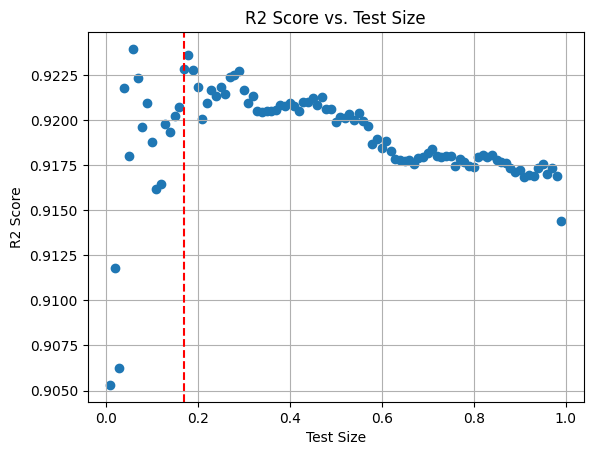

In [72]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

r2_scores = []
test_sizes = []

# 從0.01開始，以0.01為單位計算到0.99的test_size
for i in range(1,100):
    a = 0.01 * i
    test_sizes.append(a)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=a, random_state=54)

    reg = LinearRegression()
    reg.fit(X_train, y_train)
    
    # 計算r2_score
    prediction = reg.predict(X_test)
    r2 = r2_score(y_test, prediction)
    
    # 將所有r2變成陣列
    r2_scores.append(r2)

# 找到r2的最大值及其對應的test_size
max_r2 = max(r2_scores)
max_r2_index = r2_scores.index(max_r2)
max_test_size = test_sizes[max_r2_index]
print(max_test_size,max_r2)

# 將所有r2作圖
plt.scatter(test_sizes,r2_scores)
plt.xlabel('Test Size')
plt.ylabel('R2 Score')
plt.title('R2 Score vs. Test Size')
plt.grid(True)

# 在0.17處畫線，其左的r2無規律，不做後續討論
plt.axvline(x=0.17, color='red', linestyle='--', label='x=0.17')



In [132]:
# print(r2_scores[5])
del r2_scores[5]
# print(test_sizes[5])
del test_sizes[5]

max_r2 = max(r2_scores)
max_r2_index = r2_scores.index(max_r2)
max_test_size = test_sizes[max_r2_index]
print(max_test_size,max_r2)



0.18 0.9236363869710867


最大值(0.06,0.9239539573739087)為不合理之值，應排除。  
排除後所得新最大值為(0.18,0.9236363869710867)  
由第一部分得知，當test_size為**0.18**時會有最大的r2_score，下一部分將就此討論random_state的影響

### 第二部分：找出random_state於何處位於最大值
在第一部分得出當test_size位於0.18時會有最大值，接著，我將操縱變因改成random_state，在[1,2^32]的範圍內隨機取10000個數  
並繪製成圖表，發現：  
> (1) random_state的分布無特定規律  
> (2) 多次出圖後發現總是有一兩個點的r2_score特別高，而r2_score的最大值大多位於0.93~0.935附近  

利用這10000筆隨機資料，找出最大值：  
>random_state = 1628249564  
>r2_score = 0.9358950863199303

1628249564 0.9358950863199303


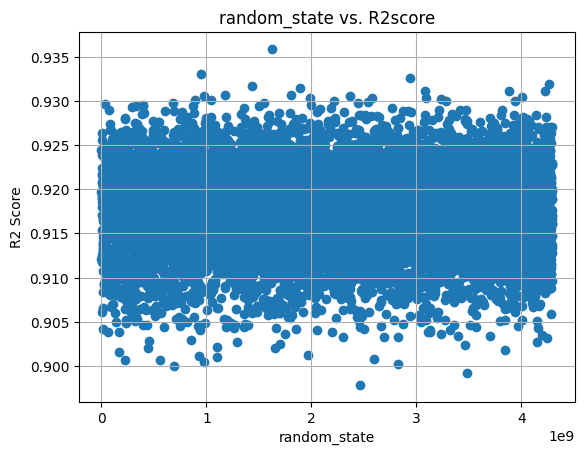

In [135]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import random
r2_scores_2 = []
random_state = []
max_r2_array = []

# 隨機取10000個數作為random_state
for i in range(10000):
    a = random.randint(1,2**32)
    random_state.append(a)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=a)

    reg = LinearRegression()
    reg.fit(X_train, y_train)
    
    # 計算r2_score
    prediction = reg.predict(X_test)
    r2_2 = r2_score(y_test, prediction)
    
    # 將所有r2變成陣列
    r2_scores_2.append(r2_2)

# 找最一萬個數中的最大值
max_r2_2 = max(r2_scores_2)
max_r2_index_2 = r2_scores_2.index(max_r2_2)
max_random_state = random_state[max_r2_index_2]
print(max_random_state,max_r2_2)

#將隨機資料繪製成圖→用以觀察random_state與r2的關係
plt.scatter(random_state,r2_scores_2)
plt.xlabel('random_state')
plt.ylabel('R2 Score')
plt.title('random_state vs. R2score')
plt.grid(True)


### 結論
> (1) 在合理的狀況下，test_size越大，r2_score越小  
> (2) random_state與r2_score的關係為隨機分布  

本次作業找到的最佳模型為：  
> **test_size = 0.18**  
> **random_state = 1628249564**  
> **r2_score = 0.9358950863199303**


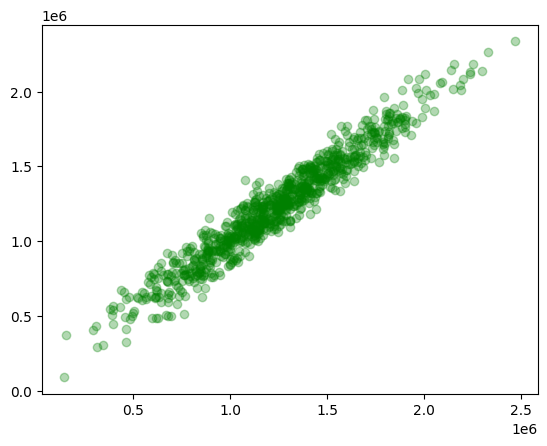

In [137]:
# 畫圖

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=1628249564)
reg = LinearRegression()
reg.fit(X_train,y_train)
prediction =reg.predict(X_test)
plt.scatter(y_test, prediction, color='green', alpha=0.3)